In [1]:
#!pip install xgboost
# https://www.kaggle.com/datasets/arathipraj/house-data?select=house_data.csv

In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#plt.style.use('')

In [3]:
#df = pd.read_csv("kc_house_data.csv")
df = pd.read_csv("house_data.csv")

In [4]:
#EDA - Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15940,8133300050,20140626T000000,200500,3,1.75,1260,9346,1.0,0,0,4,7,1260,0,1963,0,98030,47.3713,-122.186,1800,9705
2835,2710600025,20141103T000000,697000,3,2.25,2420,5304,1.5,0,0,5,7,1640,780,1947,0,98115,47.6765,-122.285,1560,5304
6581,3275750290,20150317T000000,480000,3,2.00,1460,7860,1.0,0,0,5,7,1460,0,1967,0,98008,47.6233,-122.108,1850,8148
16600,930000425,20150301T000000,440000,3,1.75,1570,5120,1.0,0,2,3,7,980,590,1947,0,98177,47.7166,-122.365,2420,7200
20133,5137800130,20150407T000000,388500,4,2.50,2718,6197,2.0,0,0,3,8,2718,0,2006,0,98092,47.3255,-122.164,2667,5000


In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [10]:
abs(df.corr()['price']).sort_values(ascending=False)  

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

<Axes: >

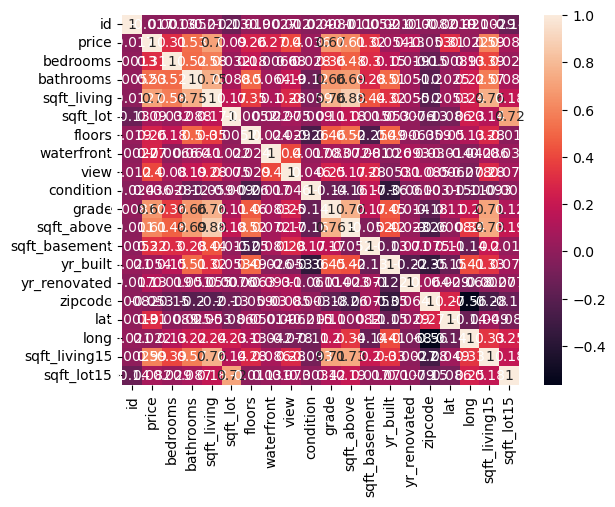

In [11]:
ax = plt.subplot( )
sns.heatmap(df.corr(),annot = True)

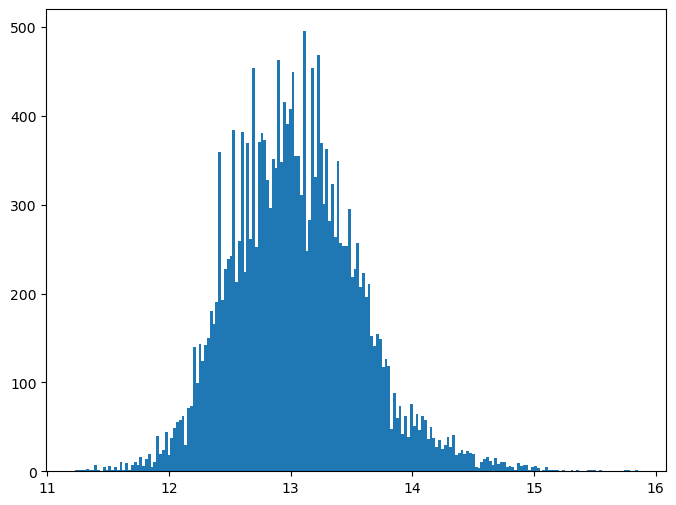

In [12]:
plt.figure(figsize = (8,6))
plt.hist(np.log(df.price), bins = 200);
#fiyat logaritmik olarak artigi icin log normal dagilimi var.

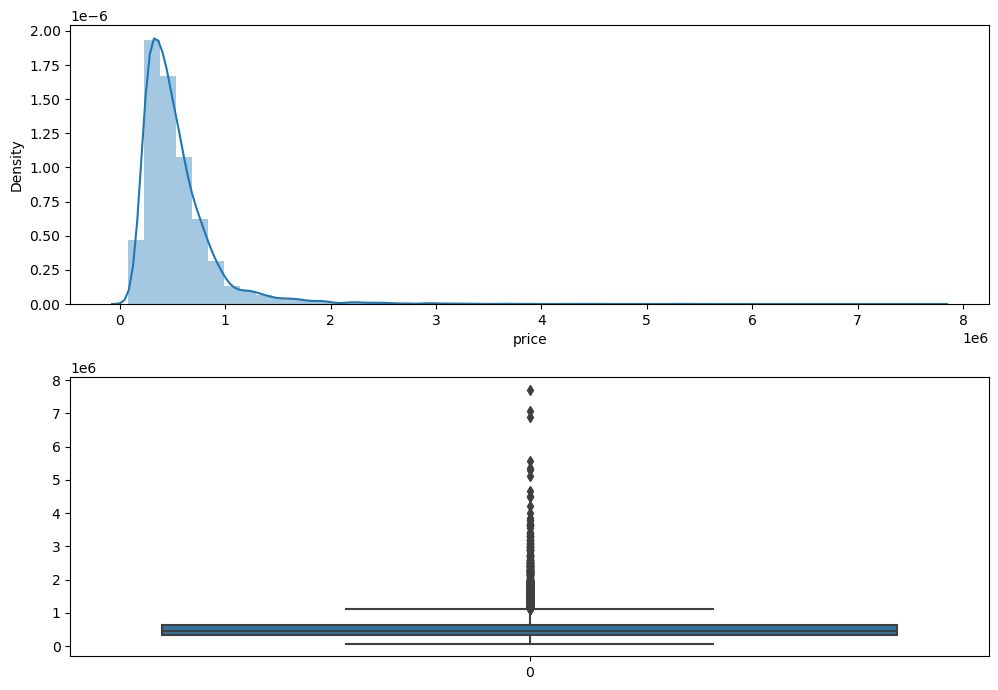

In [13]:
fig= plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout();
#evlerin cogu 100k ile 2mil $ arasinda

<Axes: xlabel='sqft_basement', ylabel='price'>

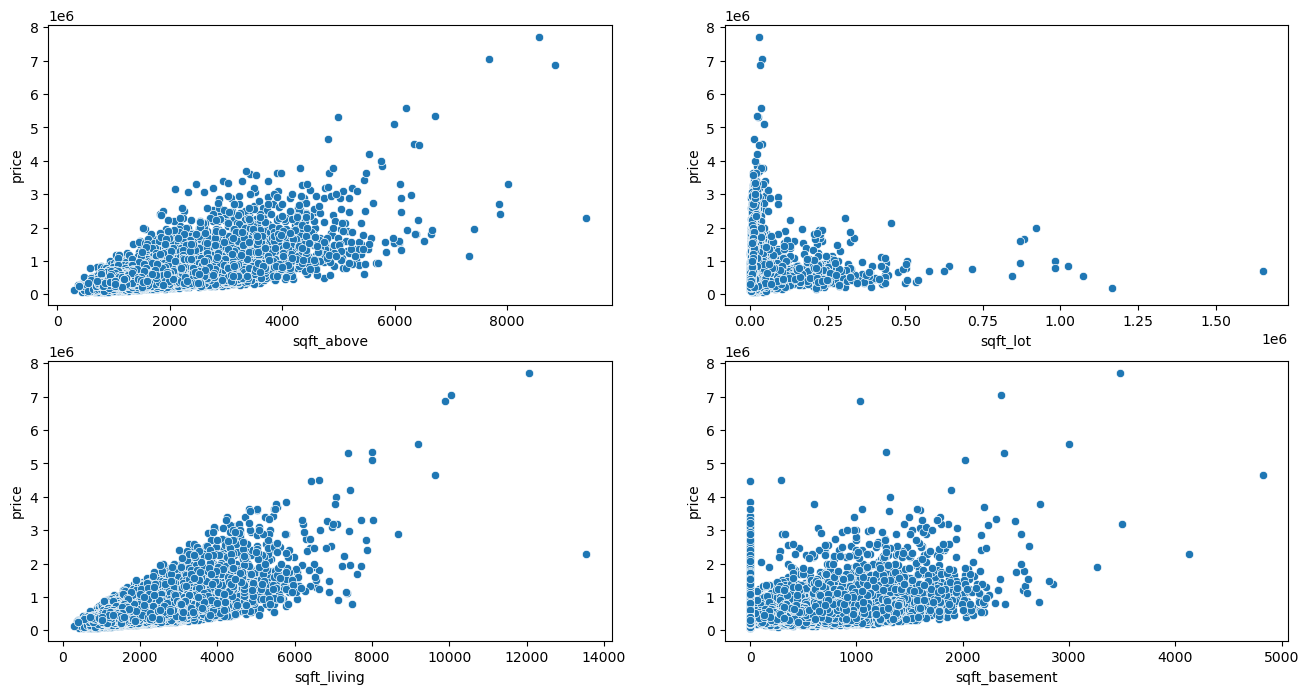

In [14]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(x=df['sqft_above'],y=df['price'])
fig.add_subplot(2,2,2)
sns.scatterplot( x=df['sqft_lot'],y=df['price'] )
fig.add_subplot(2,2,3)
sns.scatterplot(x= df['sqft_living'],y=df['price'] )
fig.add_subplot(2,2,4)
sns.scatterplot( x=df['sqft_basement'],y=df['price'] )

# Below graphs indicate considerable correlation between sqft_above, sqft_living and price

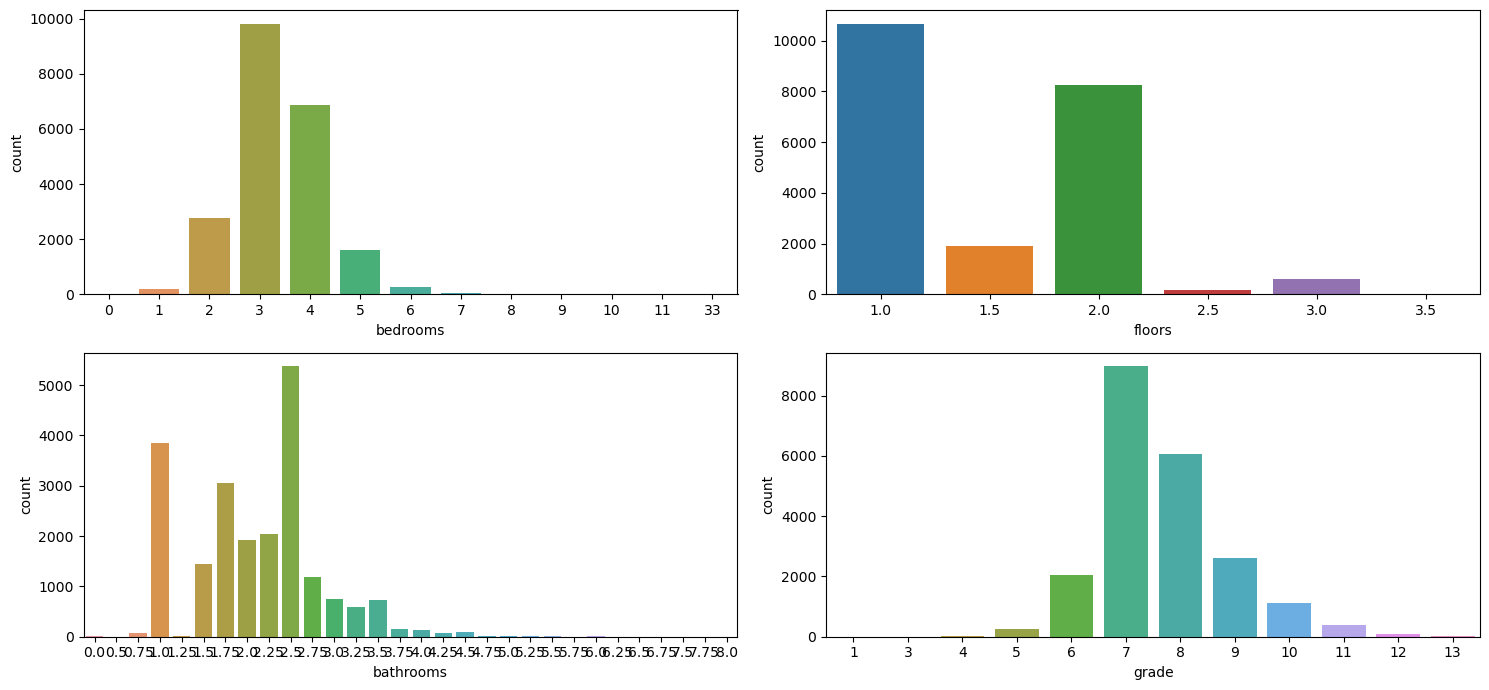

In [15]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(x=df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(x=df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(x=df['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(x=df['grade'])
plt.tight_layout()

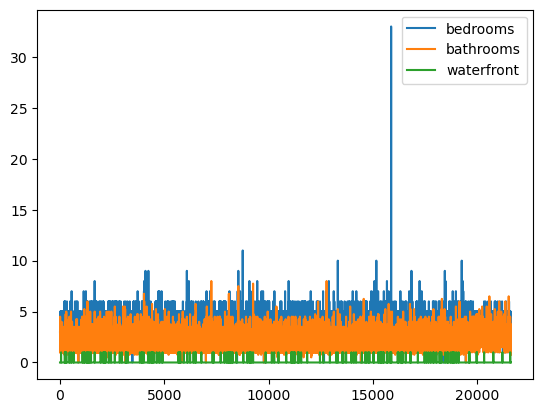

In [16]:
df.bedrooms.plot(),df.bathrooms.plot(),df.waterfront.plot()
plt.legend();

<Axes: >

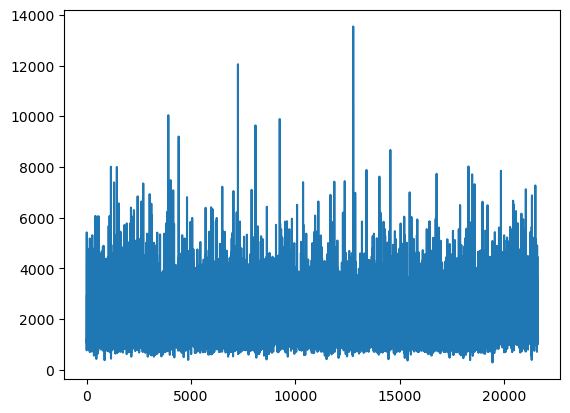

In [17]:
df.sqft_living.plot()

<Axes: >

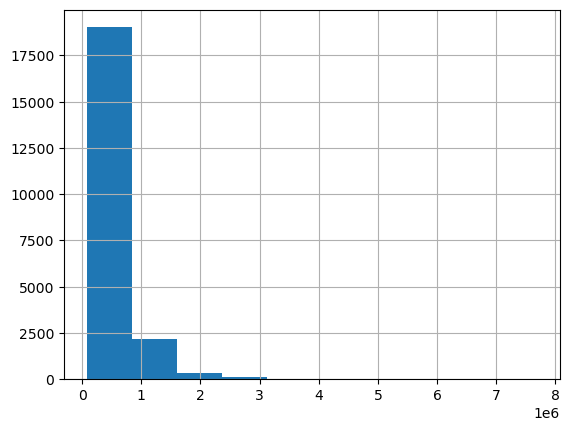

In [18]:
df.price.hist()

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id               5.185851e+09
price            3.230500e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.123000e+03
sqft_lot         5.648000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.070000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
dtype: float64


In [20]:
# FEATURE ENGINEERING
# Elimizde olan verilerle bir cikarim yaparak yeni veri olusturmak 
# (cikarim sanati):  ornek olarak bina yapim  yilindan binanin yasini 
# cikarmak ve bunu sutun haline getirip dataya eklemek

In [21]:
df['zipcode'] = df['zipcode'].astype('category')

In [22]:
df=df [ df['bedrooms']< 10 ]

In [23]:
df=df [ df['bedrooms']< 7 ]

In [24]:
df['bedrooms']= df['bedrooms']**2

In [25]:
df['age'] = 2022 - df['yr_built']

In [26]:
df['bathrooms'] = df['bathrooms']**2

In [27]:
# if there is basemsent 1, otherwise 0
# if renovated 1, otherwise 0
df['basement'] = np.where(df['sqft_basement'] > 0, 1, 0 )
df['renovated'] = np.where(df['yr_renovated'] > 0, 1, 0 )

In [28]:
df.quantile(0.97).astype(int)

id              -2147483648
price               1385000
bedrooms                 25
bathrooms                12
sqft_living            4120
sqft_lot              67496
floors                    2
waterfront                0
view                      3
condition                 5
grade                    10
sqft_above             3690
sqft_basement          1330
yr_built               2013
yr_renovated           1989
lat                      47
long                   -121
sqft_living15          3560
sqft_lot15            51425
age                     112
basement                  1
renovated                 1
Name: 0.97, dtype: int32

In [29]:
#removing outliers 

outliers = df.quantile(.97)
df = df[ (df['price'] < outliers['price'] )  ]
df = df[ (df['bedrooms'] < outliers['bedrooms'] )  ]
df = df[ (df['sqft_living'] < outliers['sqft_living'] )  ]

In [30]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,basement,renovated
count,1.901600e+04,1.901600e+04,19016.000000,19016.000000,19016.000000,1.901600e+04,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000,19016.000000
mean,4.605597e+09,4.766736e+05,10.535970,4.454972,1902.631731,1.417240e+04,1.472681,0.003997,0.177640,3.406132,7.510938,1664.215976,238.415755,1970.549958,76.496109,47.556968,-122.215373,1897.756994,12198.423012,51.450042,0.361853,0.038336
std,2.883228e+09,2.219785e+05,4.291149,2.769018,710.150806,3.874220e+04,0.541497,0.063094,0.656204,0.648729,1.035873,683.700523,375.104152,29.226862,383.153590,0.141417,0.143028,598.202860,25494.277646,29.226862,0.480549,0.192012
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.000000,0.000000,0.000000
25%,2.130628e+09,3.100000e+05,9.000000,2.250000,1370.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1951.000000,0.000000,47.459475,-122.332000,1460.000000,5000.000000,26.000000,0.000000,0.000000
50%,3.904970e+09,4.300000e+05,9.000000,4.000000,1800.000000,7.439000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1974.000000,0.000000,47.567800,-122.238000,1780.000000,7500.000000,48.000000,0.000000,0.000000
75%,7.346850e+09,5.950000e+05,16.000000,6.250000,2350.000000,1.019600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2050.000000,460.000000,1996.000000,0.000000,47.680025,-122.125000,2250.000000,9800.000000,71.000000,1.000000,0.000000
max,9.900000e+09,1.381000e+06,16.000000,25.000000,4110.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,4110.000000,2030.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,560617.000000,122.000000,1.000000,1.000000


In [31]:
x = df[['bedrooms','bathrooms','sqft_living', 'grade', 'zipcode', 'view', 'basement','waterfront','floors','age','renovated','condition','sqft_above' ]]

In [32]:
x.head()

,bedrooms,bathrooms,sqft_living,grade,zipcode,view,basement,waterfront,floors,age,renovated,condition,sqft_above
0,9,1.0000,1180,7,98178,0,0,0,1.0,67,0,3,1180
1,9,5.0625,2570,7,98125,0,1,0,2.0,71,1,3,2170
2,4,1.0000,770,6,98028,0,0,0,1.0,89,0,3,770
3,16,9.0000,1960,7,98136,0,1,0,1.0,57,0,5,1050
4,9,4.0000,1680,8,98074,0,0,0,1.0,35,0,3,1680


In [33]:
y = df['price']

In [34]:
y.shape

(19016,)

In [35]:
y.head()

0    221900
1    538000
2    180000
3    604000
4    510000
Name: price, dtype: int64

In [36]:
x = pd.get_dummies(x,drop_first = True)

In [37]:
#pd.to_pickle("./kc_house.pkl")

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15212, 81), (3804, 81), (15212,), (3804,))

In [40]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train) # model ogrenme kismi

In [41]:
y_pretest = regmodel.predict(x_test) # tahmin yapiliyor

In [42]:
mean_squared_error(y_test, y_pretest)**0.5

93678.67042980327

In [43]:
r2_score(y_test,y_pretest)

0.8200926851037673

In [44]:
from sklearn.linear_model import Ridge, Lasso

In [45]:
R = Ridge()
R.fit(x_train,y_train)
y_pred_ridge = R.predict(x_test)

In [46]:
mean_squared_error(y_test,y_pred_ridge)**0.5

93986.44826822336

In [47]:
r2_score(y_test,y_pred_ridge)

0.8189085853565837

In [48]:
#Lasso Regresssion

In [49]:
L = Lasso()
L.fit(x_train,y_train)
y_pred_lasso = L.predict(x_test)
y_pred_lasso

array([500752.09568811, 796791.30831809, 672029.28373295, ...,
       617914.1648763 , 775148.78174966, 225136.07018273])

In [50]:
mean_squared_error(y_test,y_pred_lasso)**0.5

93693.73335306723

In [51]:
r2_score(y_test,y_pred_lasso)

0.8200348245911006

In [52]:
from sklearn.linear_model import ElasticNet #Lasso ile Ridge`i kullanir.
from sklearn.tree import ExtraTreeRegressor
E = ElasticNet(l1_ratio=0.8)

In [53]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [54]:
mean_squared_error(y_test,y_pred_elastic)**0.5

140893.5665145795

In [55]:
r2_score(y_test,y_pred_elastic)

0.5930418869289867

In [56]:
#ExtraTreeRegressor
ETR = ExtraTreeRegressor()

In [57]:
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test)

In [58]:
(mean_squared_error(y_test,y_pred_etr ) )**0.5

134100.88056728218

In [59]:
r2_score(y_test,y_pred_etr)

0.6313360732076441

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)

GradientBoostingRegressor()

In [63]:
y_pred_gbr = GBR.predict(x_test)

In [64]:
mean_squared_error(y_test,y_pred_gbr)**0.5

114082.40244555786

In [65]:
r2_score(y_test,y_pred_gbr)

0.7331884031604323

In [66]:
# K Neighbors # konuma gore diger ev fiyatlarina bakarak fiyat tahmin ediyor
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor(n_neighbors = 10, weights = 'uniform')
model = est.fit(x_train,y_train)

In [67]:
y_pred_knb = model.predict(x_test)

In [68]:
y_pred_knb.shape

(3804,)

In [69]:
mean_squared_error(y_test,y_pred_knb)**0.5

166874.88706018854

In [70]:
r2_score(y_test,y_pred_knb)

0.42911404981007173

In [71]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
XGBC = XGBRegressor()
model = XGBC.fit(x_train,y_train)
pred = model.predict(x_test)

In [72]:
y_pred_xgb = model.predict(x_test)

In [73]:
mean_squared_error(y_test,y_pred_xgb)**0.5

95667.8794684068

In [74]:
r2_score(y_test,y_pred_xgb)

0.8123711223475184

In [75]:
# DRY Do not repeat yourself

In [76]:
def algo_test(x,y):
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    XGBC = XGBRegressor()
    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 13)
    
    algos = [L, E, R, Lass, ETR, GBR, XGBC]
    algo_names = ['Linear', 'ElasticNet','Ridge','Lasso','Extra Tree', 'Gradient Boosting', 'XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns =['R_Squared','RMSE','MAE'], index = algo_names)
    
    for algo in algos :
        algo.fit(x_train,y_train)
        r_squared.append(r2_score( y_test, algo.predict(x_test) ) )
        rmse.append(mean_squared_error( y_test, algo.predict(x_test) )**0.5 )
        mae.append( mean_absolute_error( y_test, algo.predict(x_test) ) )
        
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    return result.sort_values('R_Squared', ascending=False )
    

In [77]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGradientBooting,0.824415,91916.028578,63981.705906
Linear,0.817793,93633.235602,67239.125042
Lasso,0.817762,93641.305029,67246.122363
Ridge,0.817054,93823.128388,67420.768710
Gradient Boosting,0.741652,111493.762468,84043.843529
Extra Tree,0.653567,129109.267376,87154.410379
ElasticNet,0.562363,145112.463798,111360.153311
